In [19]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [21]:
customers = pd.read_csv('../Customers.csv')
products = pd.read_csv('../Products.csv')
transactions = pd.read_csv('../Transactions.csv')

print("Customers.csv first few rows")
print(customers.head())

print("\nProducts.csv first few rows")
print(products.head())

print("Transactions.csv first few rows")
print(transactions.head())


Customers.csv first few rows
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  10-07-2022
1      C0002      Elizabeth Lutz           Asia  13-02-2022
2      C0003      Michael Rivera  South America  07-03-2024
3      C0004  Kathleen Rodriguez  South America  09-10-2022
4      C0005         Laura Weber           Asia  15-08-2022

Products.csv first few rows
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions.csv first few rows
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54   

In [22]:
#Starting with Data Cleaning
#checking for missing values
print("Missing values in Customers")
print(customers.isnull().sum())

print("\nMissing values in Products")
print(products.isnull().sum())

print("\nMissing values in Transactions")
print(transactions.isnull().sum())

Missing values in Customers
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [23]:
#checking for duplicate values

print("Duplicates in customer.csv = ",customers.duplicated().sum())
print("Duplicates in products.csv = ",products.duplicated().sum())
print("Duplicates in transcations.csv = ",transactions.duplicated().sum())

Duplicates in customer.csv =  0
Duplicates in products.csv =  0
Duplicates in transcations.csv =  0


In [24]:
#Date Converted to Suitable Format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format='%d-%m-%Y')
print("Customers data type:")
print(customers.dtypes)

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print("\n Transactions data type:")
print(transactions.dtypes)


Customers data type:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

 Transactions data type:
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [25]:
#Merging tables

merged_data = pd.merge(transactions,products, on='ProductID', how='left')

merged_data = pd.merge(merged_data, customers, on='CustomerID', how='left')

print("Merged Data:")
print(merged_data.head())

Merged Data:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins         Europ

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


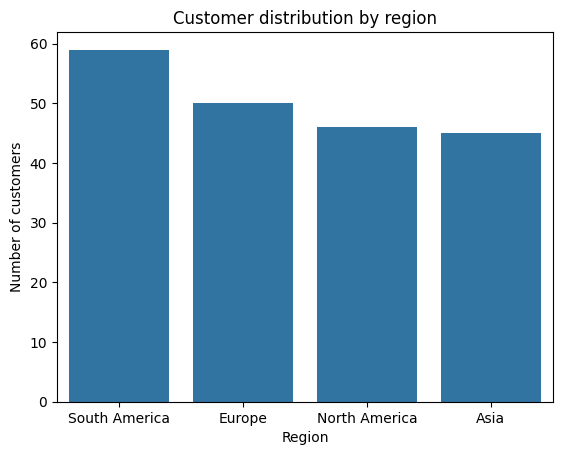

In [26]:
#Performing EDA

#which region has max number of customers?

region_counts = customers['Region'].value_counts()
print(region_counts)

#Plotting a graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer distribution by region')
plt.xlabel('Region')
plt.ylabel('Number of customers')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_32092\2335369868.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  signup_trend = customers.set_index('SignupDate').resample('M').size()


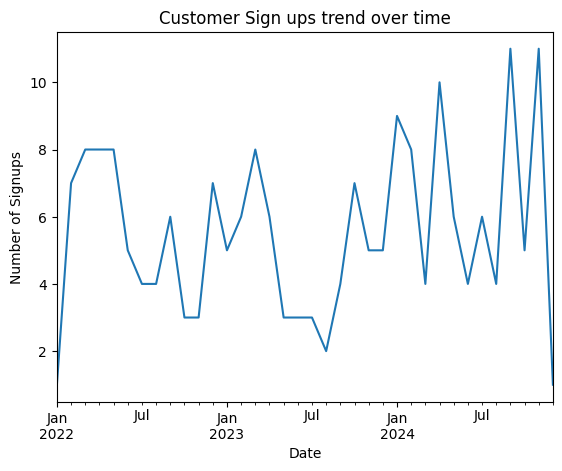

In [27]:
#Finding months with maximum sign ups
signup_trend = customers.set_index('SignupDate').resample('M').size()
signup_trend.plot()
plt.title('Customer Sign ups trend over time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

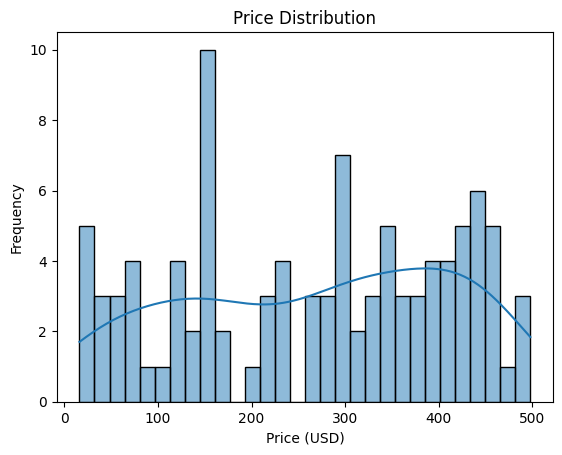

In [28]:
#Analyzing Product based on Price Distribution and Top-Selling Category

sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

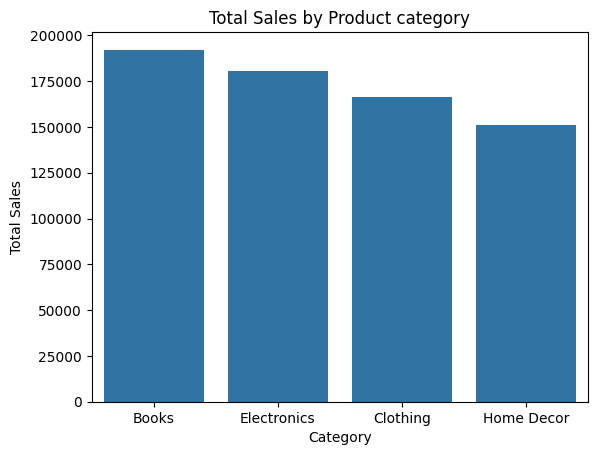

In [29]:
#finding Top Selling products

category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
category_sales = category_sales.sort_values(by='TotalValue', ascending=False)

sns.barplot(x='Category', y='TotalValue', data=category_sales)
plt.title('Total Sales by Product category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_32092\14400063.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = merged_data.set_index('TransactionDate').resample('M')['TotalValue'].sum()


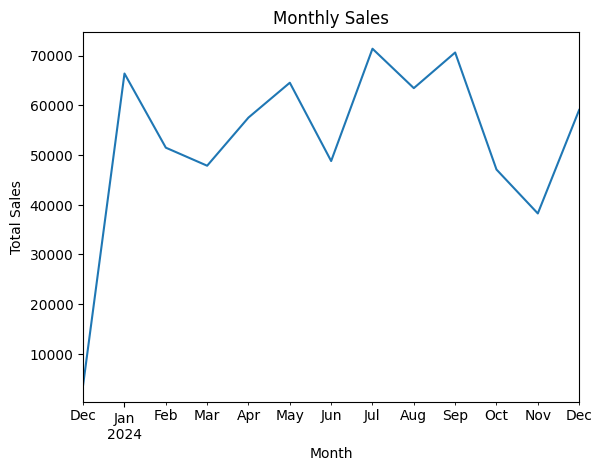

In [30]:
#Analyzing transactions

sales_trend = merged_data.set_index('TransactionDate').resample('M')['TotalValue'].sum()
sales_trend.plot()
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

Top 10 Customers by Total Spending:
    CustomerID  TotalSpending
140      C0141       10673.87
53       C0054        8040.39
64       C0065        7663.70
155      C0156        7634.45
81       C0082        7572.91
186      C0188        7111.32
58       C0059        7073.28
27       C0028        6819.57
98       C0099        6715.72
164      C0165        6708.10

High-Value Customers (Top 5% by Spending):
    CustomerID  TotalSpending
140      C0141       10673.87
53       C0054        8040.39
64       C0065        7663.70
155      C0156        7634.45
81       C0082        7572.91
186      C0188        7111.32
58       C0059        7073.28
27       C0028        6819.57
98       C0099        6715.72
164      C0165        6708.10

Region Distribution of High-Value Customers:
Region
South America    32
North America    29
Asia             16
Europe           10
Name: count, dtype: int64


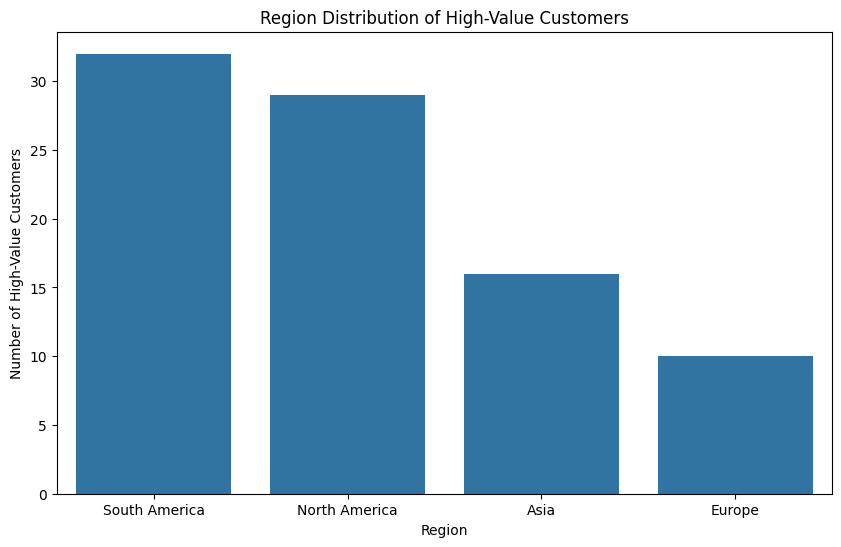

In [31]:
# Calculating Total Spending per Customer
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)

# Display the top 10 customers based on total spending
print("Top 10 Customers by Total Spending:")
print(customer_spending.sort_values(by='TotalSpending', ascending=False).head(10))

#Identifying High-value customers
high_value_threshold = customer_spending['TotalSpending'].quantile(0.95)  # Top 5%
high_value_customers = customer_spending[customer_spending['TotalSpending'] > high_value_threshold]

print("\nHigh-Value Customers (Top 5% by Spending):")
print(high_value_customers.sort_values(by='TotalSpending', ascending=False))

#gaining insights

# Merging high-value customer data with the full dataset
high_value_data = pd.merge(high_value_customers, merged_data, on='CustomerID', how='left')

# Insight 1: Region Distribution of High-Value Customers
high_value_region = high_value_data['Region'].value_counts()
print("\nRegion Distribution of High-Value Customers:")
print(high_value_region)

plt.figure(figsize=(10, 6))
sns.barplot(x=high_value_region.index, y=high_value_region.values)
plt.title('Region Distribution of High-Value Customers')
plt.xlabel('Region')
plt.ylabel('Number of High-Value Customers')
plt.show()




Top Product Categories for High-Value Customers:
Category
Clothing       26
Books          24
Electronics    20
Home Decor     17
Name: count, dtype: int64


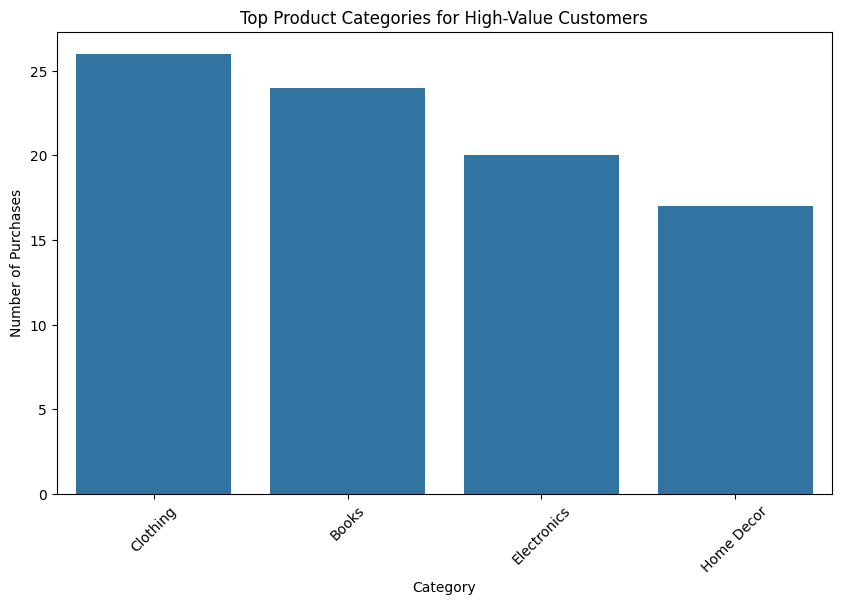

In [32]:
# Insight 2: Product Categories Preferred by High-Value Customers
high_value_categories = high_value_data['Category'].value_counts()
print("\nTop Product Categories for High-Value Customers:")
print(high_value_categories)

plt.figure(figsize=(10, 6))
sns.barplot(x=high_value_categories.index, y=high_value_categories.values)
plt.title('Top Product Categories for High-Value Customers')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()



In [33]:
# Insight 4: Purchase Frequency of High-Value Customers
high_value_purchase_frequency = high_value_data.groupby('CustomerID')['TransactionID'].count().reset_index()
high_value_purchase_frequency.rename(columns={'TransactionID': 'PurchaseFrequency'}, inplace=True)

print("\nPurchase Frequency of High-Value Customers:")
print(high_value_purchase_frequency.sort_values(by='PurchaseFrequency', ascending=False))




Purchase Frequency of High-Value Customers:
  CustomerID  PurchaseFrequency
7      C0156                 11
3      C0065                 10
6      C0141                 10
8      C0165                  9
0      C0028                  8
1      C0054                  8
2      C0059                  8
5      C0099                  8
9      C0188                  8
4      C0082                  7


In [34]:
# Insight 5: Total Revenue Contribution of High-Value Customers
total_revenue = merged_data['TotalValue'].sum()
high_value_revenue = high_value_data['TotalValue'].sum()
high_value_revenue_contribution = (high_value_revenue / total_revenue) * 100

print(f"\nHigh-Value Customers Contribute {high_value_revenue_contribution:.2f}% of Total Revenue.")


High-Value Customers Contribute 11.02% of Total Revenue.
